In [73]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Train dataset

In [74]:
#loading the dataset
data=pd.read_csv('flipr_t.csv')

In [75]:
# looking at top 5 rows of data.
data.head()

,Unnamed: 0,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [76]:
#Taking out details of data.
data.describe()

,Unnamed: 0,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,7383.000000,7345.000000,7321.000000,7322.000000,7149.000000,7.115000e+03,6984.000000,7007.000000,7312.000000,7306.000000,7298.000000,7358.000000,7383.000000
mean,3691.000000,486.188167,24218.079195,54.746004,105.543623,1.041827e+07,5.436840,0.140654,0.038496,33.991103,0.944722,4.996782,569.522650
std,2131.432851,278.280638,19602.174448,25.865877,55.284466,5.689059e+06,1.655755,0.384544,0.013406,34.036816,0.202732,2.616719,423.896621
min,0.000000,5.250000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,1845.500000,247.100000,11270.150000,32.722500,57.630000,5.577644e+06,4.020000,0.030000,0.026900,1.000000,0.770000,2.762500,223.516594
50%,3691.000000,488.380000,12765.840000,54.510000,105.770000,1.048238e+07,5.440000,0.110000,0.038400,17.700000,0.940000,5.020000,458.716483
75%,5536.500000,724.020000,38182.080000,77.397500,154.130000,1.529882e+07,6.870000,0.230000,0.050200,74.900000,1.120000,7.217500,827.927051
max,7382.000000,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


#since mean of some columns was very high compared to the median, so checking for the presence of outliers.

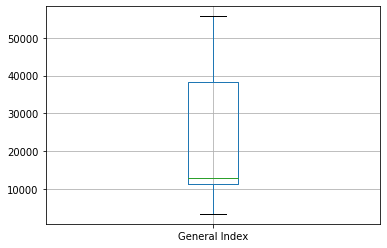

In [77]:
#visualising box and whisker plot for General Index Column.
data['General Index'].to_frame().boxplot()

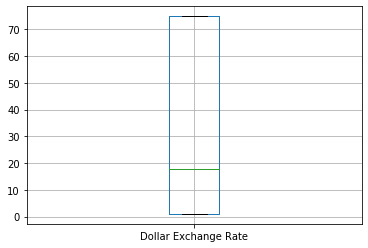

In [78]:
#visualising box and whisker plot for Dollar Exchange Rate Column.
data['Dollar Exchange Rate'].to_frame().boxplot()

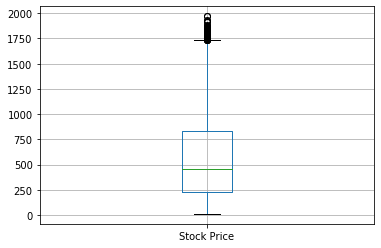

In [79]:
#visualising box and whisker plot for Stock Price Column.
data['Stock Price'].to_frame().boxplot()

In [80]:
# removal of outliers if any.

In [81]:
Q1 = data['Stock Price'].quantile(0.25)
Q3 = data['Stock Price'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Stock Price'] >= Q1 - 1.5 * IQR) & (data['Stock Price'] <= Q3 + 1.5 *IQR)
data['Stock Price']=data['Stock Price'].loc[filter] 

In [82]:
Q1 = data['General Index'].quantile(0.25)
Q3 = data['General Index'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['General Index'] >= Q1 - 1.5 * IQR) & (data['General Index'] <= Q3 + 1.5 *IQR)
data['General Index']=data['General Index'].loc[filter] 

In [83]:
Q1 = data['Dollar Exchange Rate'].quantile(0.25)
Q3 = data['Dollar Exchange Rate'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Dollar Exchange Rate'] >= Q1 - 1.5 * IQR) & (data['Dollar Exchange Rate'] <= Q3 + 1.5 *IQR)
data['Dollar Exchange Rate']=data['Dollar Exchange Rate'].loc[filter] 

In [84]:
data.describe()

,Unnamed: 0,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,7383.000000,7345.000000,7321.000000,7322.000000,7149.000000,7.115000e+03,6984.000000,7007.000000,7312.000000,7306.000000,7298.000000,7358.000000,7318.000000
mean,3691.000000,486.188167,24218.079195,54.746004,105.543623,1.041827e+07,5.436840,0.140654,0.038496,33.991103,0.944722,4.996782,558.496763
std,2131.432851,278.280638,19602.174448,25.865877,55.284466,5.689059e+06,1.655755,0.384544,0.013406,34.036816,0.202732,2.616719,409.200458
min,0.000000,5.250000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,1845.500000,247.100000,11270.150000,32.722500,57.630000,5.577644e+06,4.020000,0.030000,0.026900,1.000000,0.770000,2.762500,222.194912
50%,3691.000000,488.380000,12765.840000,54.510000,105.770000,1.048238e+07,5.440000,0.110000,0.038400,17.700000,0.940000,5.020000,454.862615
75%,5536.500000,724.020000,38182.080000,77.397500,154.130000,1.529882e+07,6.870000,0.230000,0.050200,74.900000,1.120000,7.217500,817.440621
max,7382.000000,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1733.782455


In [85]:
#calculation of null count in the columns.
data.isnull().sum()

Unnamed: 0                0
Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price              65
dtype: int64

In [86]:
#Since Stock Price is our label column, so we are dropping the null values in that column because 
#it might lead to wrong predictions.
data_clean=data.dropna(subset=['Stock Price'])

In [87]:
data_clean.isnull().sum()

Unnamed: 0                0
Stock Index               0
Index                     0
Industry                  0
VWAP                     37
General Index            61
NAV                      60
P/E Ratio               232
Volumes Traded          267
Inventory Turnover      395
Covid Impact (Beta)     372
Tracking Error           71
Dollar Exchange Rate     76
Put-Call Ratio           85
P/B Ratio                24
Stock Price               0
dtype: int64

In [88]:
#filling of null values with median so that there is no effect of skewness.
data_clean=data_clean.fillna(data_clean.median())

In [89]:
data_clean.isnull().sum()

Unnamed: 0              0
Stock Index             0
Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64

In [90]:
data_clean.head()

,Unnamed: 0,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.350,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.560,13753356.0,3.10,0.23,0.0164,1.0,0.94,6.91,560.859622
2,2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.580,6892003.0,7.70,0.23,0.0396,1.0,0.94,6.09,1279.732874
3,3,AA4,BSE,Materials,828.13,38182.08,73.66,151.760,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,4,AA5,S&P 500,Real Estate,487.03,3351.28,23.79,104.775,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [91]:
# No need of Unnamed: 0 , so we willdrop it.
#checking for covariance to know the direction of relationships between various variables.
data_clean=data_clean.drop(['Unnamed: 0'],axis=1)
data_clean.cov().round(1)

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
VWAP,77044.0,-25324.6,6.9,-235.9,8.864380e+06,-2.4,-1.6,-0.0,-102.6,0.2,-14.4,1007.9
General Index,-25324.6,381752838.8,-3223.2,10893.3,2.095115e+06,229.8,55.2,-1.7,114016.0,-0.4,122.8,54855.2
NAV,6.9,-3223.2,654.4,-56.4,-1.707504e+06,0.3,-0.0,-0.0,7.0,0.0,-0.9,6489.3
P/E Ratio,-235.9,10893.3,-56.4,2922.7,-6.890998e+05,-0.1,0.1,0.0,-6.2,-0.0,0.3,14708.8
Volumes Traded,8864379.8,2095114.6,-1707503.8,-689099.8,3.119177e+13,-23223.2,26406.4,296.7,750329.6,16126.2,37176.4,-20975332.7
Inventory Turnover,-2.4,229.8,0.3,-0.1,-2.322320e+04,2.6,0.0,0.0,-0.5,0.0,0.0,3.3
Covid Impact (Beta),-1.6,55.2,-0.0,0.1,2.640640e+04,0.0,0.1,0.0,0.1,0.0,-0.0,0.3
Tracking Error,-0.0,-1.7,-0.0,0.0,2.967000e+02,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Dollar Exchange Rate,-102.6,114016.0,7.0,-6.2,7.503296e+05,-0.5,0.1,0.0,1149.9,0.0,0.9,-15.4
Put-Call Ratio,0.2,-0.4,0.0,-0.0,1.612620e+04,0.0,0.0,0.0,0.0,0.0,0.0,-0.0


In [92]:
#to quantify the strength of the relationships between variables.
#will help us choose the best variables.
data_clean.corr().round(2)

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
VWAP,1.00,-0.00,0.00,-0.02,0.01,-0.01,-0.02,-0.01,-0.01,0.00,-0.02,0.01
General Index,-0.00,1.00,-0.01,0.01,0.00,0.01,0.01,-0.01,0.17,-0.00,0.00,0.01
NAV,0.00,-0.01,1.00,-0.04,-0.01,0.01,-0.00,-0.00,0.01,0.01,-0.01,0.62
P/E Ratio,-0.02,0.01,-0.04,1.00,-0.00,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.66
Volumes Traded,0.01,0.00,-0.01,-0.00,1.00,-0.00,0.01,0.00,0.00,0.01,0.00,-0.01
Inventory Turnover,-0.01,0.01,0.01,-0.00,-0.00,1.00,0.03,0.01,-0.01,0.00,0.01,0.01
Covid Impact (Beta),-0.02,0.01,-0.00,0.00,0.01,0.03,1.00,0.01,0.01,0.00,-0.00,0.00
Tracking Error,-0.01,-0.01,-0.00,0.01,0.00,0.01,0.01,1.00,0.01,0.00,-0.01,0.01
Dollar Exchange Rate,-0.01,0.17,0.01,-0.00,0.00,-0.01,0.01,0.01,1.00,0.00,0.01,-0.00
Put-Call Ratio,0.00,-0.00,0.01,-0.00,0.01,0.00,0.00,0.00,0.00,1.00,0.01,-0.00


In [93]:
#dropping stock index because for training our model, it doesn't provide us with any valuable info.
final_data=data_clean.drop(['Stock Index'],axis=1)
#creating dummy variables for our categorical columns.
final_data=pd.get_dummies(final_data)

In [94]:
#checking the dimensions of the dataset.
final_data.shape

(7318, 22)

In [95]:
#choosing our label column and dataset for training.
y=final_data['Stock Price']
x=final_data.drop(['Stock Price'],axis=1)

In [96]:
#rounding up stock prices till 2 because it will give us better readibility of the data.
y=y.round(2)
y

0        156.99
1        560.86
2       1279.73
3       1121.79
4        382.96
         ...   
7378     248.02
7379     494.56
7380     500.87
7381     113.17
7382     236.64
Name: Stock Price, Length: 7318, dtype: float64

In [97]:
#We are using minmax to negate the effect of skewness in our dataset.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
#Since we took y as a singular column, so it was as Series.
#Using .to_frame() we convert it to a dataframe.
scaler.fit(y.to_frame())
y_scaled=scaler.transform(y.to_frame())

In [98]:
#splitting our dataset for training and testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.20)

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [104]:
#creating a neural network.
classifier=Sequential()
classifier.add(Dense(output_dim=20,activation='relu',input_dim=21))
classifier.add(Dropout(0.05))
classifier.add(Dense(output_dim=10,activation='relu'))
classifier.add(Dense(output_dim=1))
classifier.compile(optimizer='adam',loss='mean_absolute_error')

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=21, units=20)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10)`
  """
C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [105]:
#model architecture.
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                440       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [106]:
history=classifier.fit(x_train,y_train,nb_epoch=20,validation_data=(x_test, y_test))

C:\Users\Neeladri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5854 samples, validate on 1464 samples
Epoch 1/20
5854/5854 [==============================] - 1s 128us/step - loss: 0.1919 - val_loss: 0.1213
Epoch 2/20
5854/5854 [==============================] - 0s 47us/step - loss: 0.1097 - val_loss: 0.0734
Epoch 3/20
5854/5854 [==============================] - 0s 44us/step - loss: 0.0823 - val_loss: 0.0543
Epoch 4/20
5854/5854 [==============================] - 0s 44us/step - loss: 0.0698 - val_loss: 0.0478
Epoch 5/20
5854/5854 [==============================] - 0s 43us/step - loss: 0.0646 - val_loss: 0.0428
Epoch 6/20
5854/5854 [==============================] - 0s 45us/step - loss: 0.0577 - val_loss: 0.0375
Epoch 7/20
5854/5854 [==============================] - 0s 44us/step - loss: 0.0521 - val_loss: 0.0391
Epoch 8/20
5854/5854 [==============================] - 0s 43us/step - loss: 0.0478 - val_loss: 0.0313
Epoch 9/20
5854/5854 [==============================] - 0s 45us/step - loss: 0.0443 - val_loss: 0.0272
Epoch 10/20
5854/5854 [=

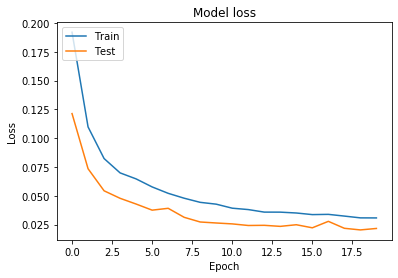

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Test dataset

In [108]:
#loading the dataset.
test_data=pd.read_csv('flipr5_test_1.csv')

In [109]:
test_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [110]:
#We have dropped stock index because it was not there in out training dataset.
test_data_feed_model=test_data.drop(['Stock Index'],axis=1)
#filling null using median to avoid effect of outliers.
test_data_feed_model=test_data_feed_model.fillna(test_data_feed_model.median())
#creating dummy variables for our test dataset categorical columns.
test_data_feed_model=pd.get_dummies(test_data_feed_model)

In [111]:
#using min max to negate the effect of skewness.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test_data_feed_model)
x_scaled=scaler.transform(test_data_feed_model)
scaler.fit(y.to_frame())
y_scaled=scaler.transform(y.to_frame())

In [112]:
#rounded up to 3 decimal places for better readability of the data.
yhat=classifier.predict(x_scaled).round(3)
yhat

array([[0.44 ],
       [0.127],
       [0.86 ],
       ...,
       [0.306],
       [0.224],
       [0.708]], dtype=float32)

In [113]:
#since the output is in scaled format according to train dataset.
#we will use min-max formula to find the original values of stock price.

In [114]:
maxx=final_data['Stock Price'].max()
maxx

1733.782455141935

In [115]:
minn=final_data['Stock Price'].min()
minn

10.573481879168863

In [116]:
#values of stock price.
output=((yhat*(maxx-minn))+minn)

In [117]:
output

array([[ 768.78546],
       [ 229.42104],
       [1492.5332 ],
       ...,
       [ 537.8754 ],
       [ 396.5723 ],
       [1230.6055 ]], dtype=float32)

In [118]:
#converting numpy array to dataframe
answer= pd.DataFrame(output, columns=["Stock Price"])

In [119]:
test_data['Stock Price']=answer

In [120]:
test_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,768.785461
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,229.421036
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,1492.533203
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,808.419250
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,236.313858


In [121]:
test_data

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,768.785461
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,229.421036
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,1492.533203
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,808.419250
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,236.313858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,AD2734,NSE,Energy,121.58,11270.15,11.93,122.28,14034395.0,2.87,0.11,0.0602,74.9,0.86,7.87,170.831924
3327,AD2735,BSE,Energy,692.25,38182.08,NaN,NaN,NaN,NaN,0.11,0.0388,74.9,0.64,0.95,539.598694
3328,AD2736,NSE,Energy,911.37,11270.15,NaN,NaN,NaN,NaN,0.11,0.0166,74.9,0.67,7.54,537.875427
3329,AD2737,BSE,Healthcare,479.38,38182.08,20.52,176.89,3069831.0,3.60,0.78,0.0495,74.9,0.79,4.01,396.572296


In [122]:
#extracting the final solution
final_solution=test_data[['Stock Index','Stock Price']]

In [123]:
final_solution

,Stock Index,Stock Price
0,AC3235,768.785461
1,AC3236,229.421036
2,AC3237,1492.533203
3,AC3238,808.419250
4,AC3239,236.313858
...,...,...
3326,AD2734,170.831924
3327,AD2735,539.598694
3328,AD2736,537.875427
3329,AD2737,396.572296


In [124]:
final_solution.to_csv("flipr5_ML_Solution_1.csv")